Your dataset: The folder 'sphaera_illustrations_dataset' contains 844 illustrations, selected from all illustrations that have been extracted from the books in the sphaera corpus 

## Load data set

In [1]:
from pathlib import Path
from PIL import Image, ImageOps
import random
import numpy as np
import matplotlib.pyplot as plt

dataset_dir = Path('../image-similarity/sphaera_illustrations_dataset')
dataset = []

for fpath in dataset_dir.iterdir():
    if fpath.suffix == '.jpg':
        dataset.append(Image.open(fpath))

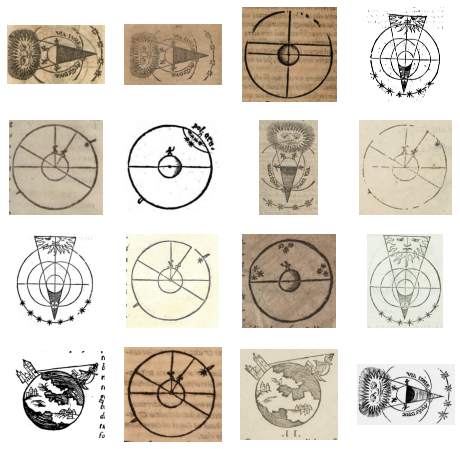

In [2]:
def plot_grid(dataset, nrows, ncols):
    assert len(dataset) == nrows*ncols
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2*ncols,2*nrows))
    axes = [axj for axi in axes for axj in axi]
    
    for ax, im in zip(axes, dataset):
        ax.imshow(im)
        ax.axis('off')
        
plot_grid(random.sample(dataset, 16), 4,4)

## Image hashing

### Ex1: implement `hash_image` function

The `hash_image` function receives a PIL image and outputs a 16x16-dimensional numpy array of zeros and ones. 
1. it should grayscale the image
2. it should resize the image to 16x16
3. it should put a 1 in the output array if the value at that position is larger than the mean and a 0 otherwise.

In [3]:
def hash_image(img):
    # begin solution

    # end solution

hashed_images = list(map(hash_image, dataset))

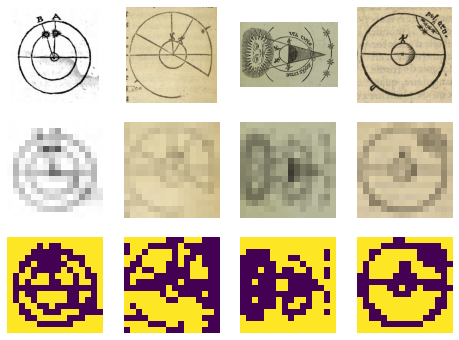

In [4]:
subset_indices = random.sample(range(len(hashed_images)), 4)
plot_grid(
    [dataset[i] for i in subset_indices]
    + [dataset[i].resize((16,16)) for i in subset_indices]
    + [hashed_images[i] for i in subset_indices]
, 3,4)

## Sort by hashing
In the following cell, the pairwise distances between all hashes are computed and stored in the square distance matrix `distances`.

### Ex2: sort image collection
Sort all images based on the distances in the distance matrix. Start from any image and always select the closest one without selecting any image twice.

In [5]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import  squareform
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering, leaves_list

hashed_images_matrix = np.array(hashed_images).reshape((len(hashed_images), -1))

distances = cdist(hashed_images_matrix, hashed_images_matrix, 'hamming')

# begin solution

# end solution

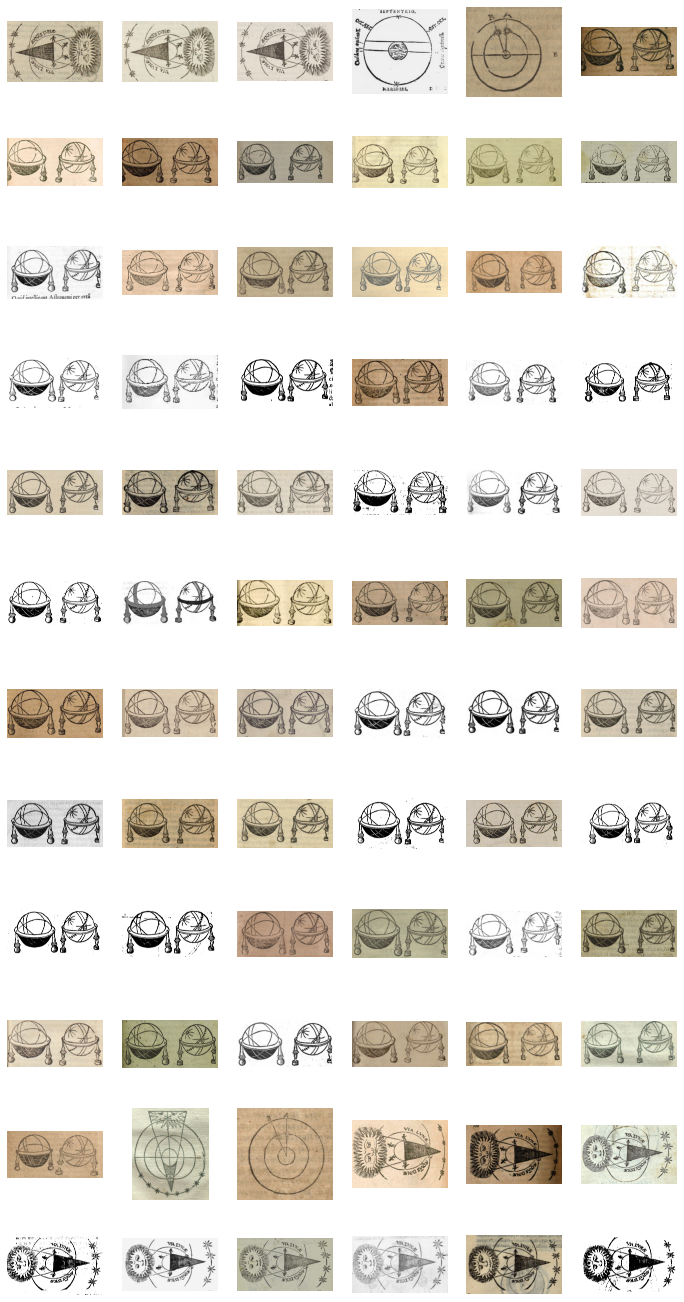

In [6]:
plot_grid(
    [dataset[i] for i in sorted_images[:72]]
, 12,6)